In [1]:
import matplotlib.pyplot as plt
import numpy as np
import utils
import pickle
%matplotlib inline  

In [5]:
FREQ_DIST_FILE = '../code/train-processed-freqdist.pkl'
BI_FREQ_DIST_FILE = '../code/train-processed-freqdist-bi.pkl'

In [6]:
with open(FREQ_DIST_FILE, 'rb') as pkl_file:
    freq_dist = pickle.load(pkl_file)
unigrams = freq_dist.most_common(20)
unigrams

[('the', 8092),
 ('to', 7782),
 ('a', 5083),
 ('i', 4627),
 ('you', 4260),
 ('and', 3903),
 ('in', 3718),
 ('for', 3569),
 ('is', 3344),
 ('of', 3334),
 ('my', 2943),
 ('love', 2135),
 ('this', 2111),
 ('on', 2100),
 ('with', 2031),
 ('it', 1981),
 ('be', 1937),
 ('day', 1772),
 ('so', 1566),
 ('all', 1537)]

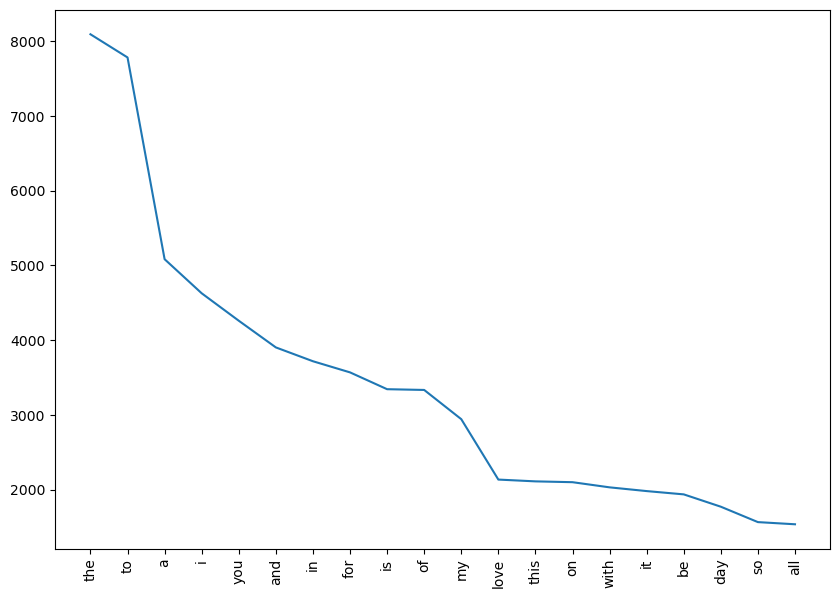

In [7]:
plt.figure(1, [10, 7])
x = np.array(range(0, 40, 2))
y = np.array([i[1] for i in unigrams])
my_xticks = [i[0] for i in unigrams]
plt.xticks(x, my_xticks, rotation=90)
plt.plot(x, y)
plt.show()

In [8]:
with open(BI_FREQ_DIST_FILE, 'rb') as pkl_file:
    freq_dist = pickle.load(pkl_file)
bigrams = freq_dist.most_common(20)
bigrams

[(('i', 'am'), 871),
 (('in', 'the'), 624),
 (('to', 'be'), 603),
 (('of', 'the'), 507),
 (('all', 'the'), 487),
 (('for', 'the'), 478),
 (('fathers', 'day'), 467),
 (('i', 'love'), 432),
 (('to', 'do'), 405),
 (('to', 'the'), 405),
 (('thankful', 'for'), 356),
 (('am', 'thankful'), 351),
 (('thankful', 'positive'), 349),
 (('you', 'will'), 322),
 (('the', 'time'), 309),
 (('to', 'see'), 307),
 (('on', 'the'), 296),
 (('i_am', 'positive'), 289),
 (('positive', 'affirmation'), 289),
 (('this', 'is'), 287)]

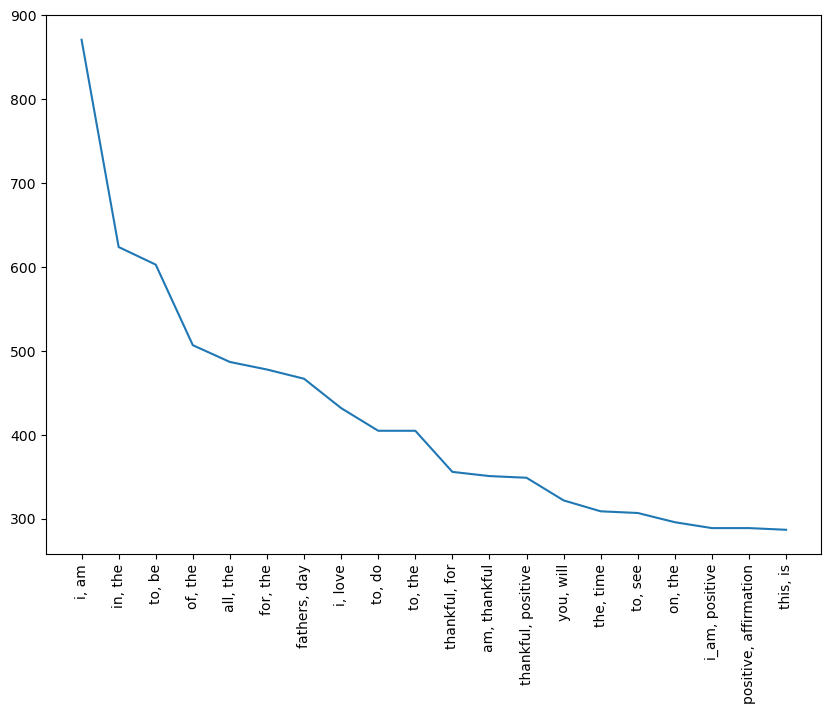

In [9]:
plt.figure(1, [10, 7])
x = np.array(range(0, 40, 2))
y = np.array([i[1] for i in bigrams])
my_xticks = [', '.join(i[0]) for i in bigrams]
plt.xticks(x, my_xticks, rotation=90)
plt.plot(x, y)
plt.show()

In [10]:
with open(FREQ_DIST_FILE, 'rb') as pkl_file:
    freq_dist = pickle.load(pkl_file)
unigrams = freq_dist.most_common(100)
log_ranks = np.log(range(1, 101))
log_freqs = np.log([i[1] for i in unigrams])
z = np.polyfit(log_ranks, log_freqs, 1)
p = np.poly1d(z)
p

poly1d([-0.7858771 ,  9.64177313])

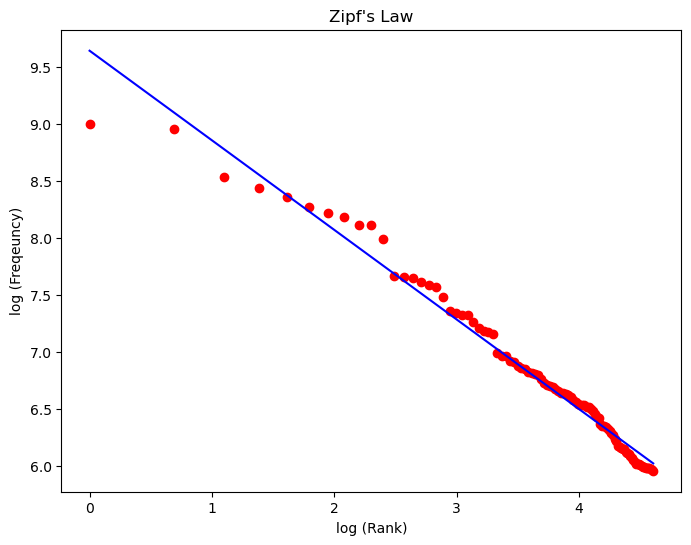

In [11]:
plt.figure(3, [8,6])
plt.plot(log_ranks, log_freqs, 'ro')
plt.plot(log_ranks,p(log_ranks),'b-')
plt.xlabel('log (Rank)')
plt.ylabel('log (Freqeuncy)')
plt.title('Zipf\'s Law')
plt.show()

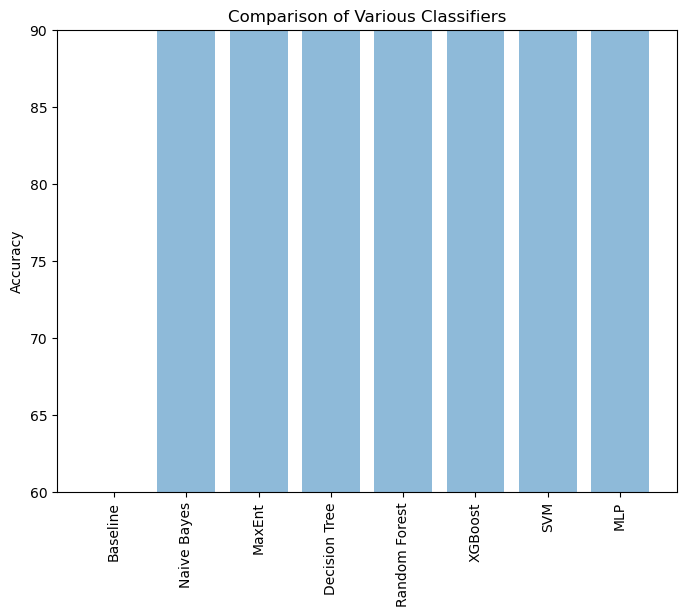

In [13]:
classifiers = ['Baseline', 'Naive Bayes', 'MaxEnt', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVM', 'MLP']
accuracies = [19.30, 94.40, 92.13, 95.26, 96.20, 96.12, 94.29,93.52]
plt.figure(4, [8,6])
plt.bar(range(len(classifiers)), accuracies, align='center', alpha=0.5)
plt.xticks(range(len(classifiers)), classifiers, rotation=90)
plt.ylabel('Accuracy')
plt.title('Comparison of Various Classifiers')
plt.ylim([60, 90])
plt.show()